In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [45]:
df = pd.read_csv("combined_data.csv")
df.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,Type
0,467124570,Livio Barone,LivioBarone34,85,47,133,0,0,NaN,it,...,La vita è troppo breve per preoccuparsi di cos...,NaN,NaN,Wed Jan 18 04:22:26 +0000 2012,2012-01-18 05:22:26,2014-06-06 23:22:44,2016-03-15 14:19:31,1,NaN,Bot
1,1970829738,A s s o n a n z e,AssonanzePage,4861,58,12,0,0,NaN,it,...,Twitter ufficiale della pagina A s s o n a n z e.,NaN,NaN,Sat Oct 19 08:27:44 +0000 2013,2013-10-19 10:27:44,2014-05-20 23:22:56,2016-03-15 14:18:39,1,NaN,Bot
2,466226701,Francesca Disti,FrancescaDisti,34,0,0,0,0,NaN,it,...,Renditi conto che si può vincere anche se i tu...,NaN,NaN,Tue Jan 17 05:40:32 +0000 2012,2012-01-17 06:40:32,2014-06-09 23:22:07,2016-03-15 14:21:36,1,NaN,Bot
3,576148031,Il tennista,Cordiluca,2374,1196,1873,0,3,NaN,it,...,"Un cuore non si giudica solo da quanto tu ami,...",NaN,NaN,Thu May 10 11:19:30 +0000 2012,2012-05-10 13:19:30,2014-06-07 23:24:07,2016-03-15 14:13:58,1,NaN,Bot
4,337287569,Mehak Sapra,mehaksapra3,2648,230,501,86,4,http://t.co/eGQiELaq5x,en,...,"Businesswoman, Founder of Highness Jewels,PR P...",NaN,NaN,Sun Jul 17 19:44:50 +0000 2011,2011-07-17 21:44:50,2015-05-01 22:36:43,2016-03-15 16:07:45,1,1.0,Genuine


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  1000 non-null   int64  
 1   name                                999 non-null    object 
 2   screen_name                         1000 non-null   object 
 3   statuses_count                      1000 non-null   int64  
 4   followers_count                     1000 non-null   int64  
 5   friends_count                       1000 non-null   int64  
 6   favourites_count                    1000 non-null   int64  
 7   listed_count                        1000 non-null   int64  
 8   url                                 191 non-null    object 
 9   lang                                1000 non-null   object 
 10  time_zone                           811 non-null    object 
 11  location                            731 non-

In [47]:
# Drop columns that are unlikely to be useful or have too many missing values
columns_to_drop = ['id', 'name', 'screen_name', 'url', 'profile_image_url', 'profile_banner_url', 
                   'profile_background_image_url_https', 'profile_image_url_https', 
                   'profile_background_image_url', 'profile_text_color', 'profile_sidebar_border_color', 
                   'profile_sidebar_fill_color', 'profile_background_color', 'profile_link_color', 
                   'created_at', 'timestamp', 'crawled_at', 'updated', 'description', 
                   'lang', 'time_zone', 'location']
df = df.drop(columns=columns_to_drop)

In [48]:
# Fill missing numerical values with median and categorical values with mode
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical
        df[column] = df[column].fillna(df[column].mode().iloc[0])
    else:  # Numerical
        df[column] = df[column].fillna(df[column].median())

In [49]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [50]:
# Encode target variable 'Type'
df['Type'] = label_encoder.fit_transform(df['Type'])  # Assuming 'Bot' is 1, 'Genuine' is 0

In [51]:
# Split data into features and target
X = df.drop('Type', axis=1)
y = df['Type']

In [52]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Display the shapes of the splits to ensure correctness
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 20), (200, 20), (800,), (200,))

In [55]:
X_train

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,test_set_1,test_set_2
29,113,0,0,0,0,1.0,1.0,1.0,1.0,1.0,10800.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1,0.0
535,2766,79,196,587,0,1.0,1.0,1.0,1.0,1.0,-25200.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,0,0.0
695,8513,463,433,2446,0,1.0,1.0,1.0,1.0,1.0,28800.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,0,0.0
557,14524,349,333,642,1,1.0,1.0,1.0,1.0,1.0,10800.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,0,0.0
836,63,0,0,0,0,1.0,1.0,1.0,1.0,1.0,10800.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,260,4303,4726,0,9,1.0,1.0,1.0,1.0,1.0,10800.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1,0.0
270,16,86,207,52,1,1.0,1.0,1.0,1.0,1.0,10800.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1,1.0
860,20438,345,204,4217,3,1.0,1.0,1.0,1.0,1.0,-25200.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,0,0.0
435,8648,121,110,1185,0,1.0,1.0,1.0,1.0,1.0,10800.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,0,0.0


In [54]:
y_train

29     0
535    1
695    1
557    1
836    0
      ..
106    0
270    1
860    1
435    1
102    0
Name: Type, Length: 800, dtype: int64

In [56]:
# Initialize and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/Users/harrychang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [57]:
# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

In [58]:
accuracy

0.96

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Precision
precision = precision_score(y_test, predictions, average='binary')
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, predictions, average='binary')
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, predictions, average='binary')
print(f'F1 Score: {f1}')


Precision: 0.9693877551020408
Recall: 0.95
F1 Score: 0.9595959595959594


In [60]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[97  3]
 [ 5 95]]


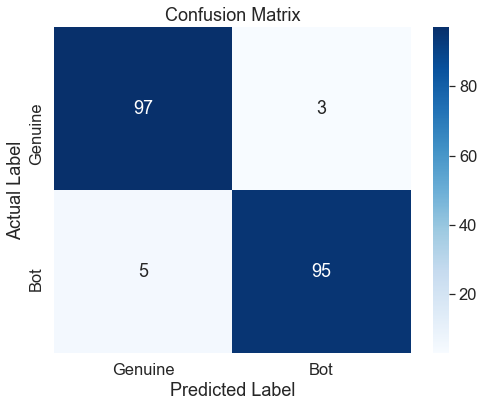

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn style
sns.set(style="white", font_scale=1.5)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Genuine', 'Bot'], yticklabels=['Genuine', 'Bot'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()